In [49]:
import pandas as pd

# 🎯 Load & prepare dataset
df = pd.read_csv('forest-cover-type-dataset/covtype.csv')

# 🧪 Sample 30K rows for speed
df_sampled = df.sample(n=30000, random_state=42)
X = df_sampled.drop('Cover_Type', axis=1)
y = df_sampled['Cover_Type']

In [50]:
# 🔀 Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 🔄 Balance classes using SMOTE
from imblearn.over_sampling import SMOTE

X_train_res, y_train_res = SMOTE(random_state=42).fit_resample(X_train, y_train)

🌲 Random Forest Classification Report:
               precision    recall  f1-score   support

           1       0.83      0.84      0.84      2213
           2       0.88      0.82      0.85      2912
           3       0.78      0.87      0.82       366
           4       0.69      0.93      0.79        27
           5       0.45      0.79      0.57        95
           6       0.62      0.69      0.65       180
           7       0.81      0.91      0.85       207

    accuracy                           0.83      6000
   macro avg       0.72      0.83      0.77      6000
weighted avg       0.84      0.83      0.83      6000

🌲 Random Forest Accuracy: 0.83


Text(120.72222222222221, 0.5, 'Actual')

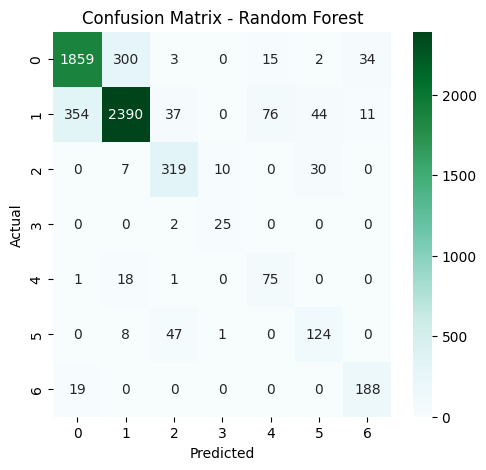

In [44]:
# 🌲 Train Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50, max_depth=20, random_state=42)
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score

print("🌲 Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("🌲 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# 🌲 Random Forest Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='BuGn')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")

🔮 XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      2213
           1       0.86      0.82      0.84      2912
           2       0.83      0.89      0.85       366
           3       0.66      0.85      0.74        27
           4       0.58      0.78      0.66        95
           5       0.67      0.71      0.69       180
           6       0.80      0.90      0.85       207

    accuracy                           0.82      6000
   macro avg       0.74      0.82      0.78      6000
weighted avg       0.83      0.82      0.82      6000

🔮 XGBoost Accuracy: 0.8235


Text(120.72222222222221, 0.5, 'Actual')

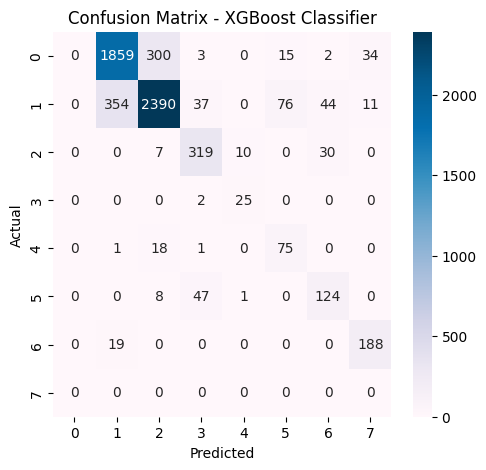

In [45]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_res_encoded = le.fit_transform(y_train_res)
y_test_encoded = le.transform(y_test)

# 🔮 Train XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier(objective='multi:softmax', num_class=7, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train_res, y_train_res_encoded)
y_pred_xgb = xgb.predict(X_test)

print("🔮 XGBoost Classification Report:\n", classification_report(y_test_encoded, y_pred_xgb))
print("🔮 XGBoost Accuracy:", accuracy_score(y_test_encoded, y_pred_xgb))

# 🔮 XGBoost Confusion Matrix
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test_encoded, y_pred_rf), annot=True, fmt='d', cmap='PuBu')
plt.title("Confusion Matrix - XGBoost Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")

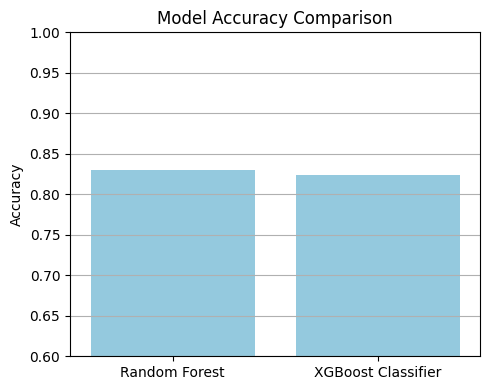

In [54]:
# 📈 Accuracy Comparison between Random Forest & XGBoost

plt.figure(figsize=(5, 4))
sns.barplot(x=["Random Forest", "XGBoost Classifier"], y=[accuracy_score(y_test, y_pred_rf), accuracy_score(y_test_encoded, y_pred_xgb)], color="skyblue")
plt.ylim(0.6, 1.0)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

,Feature,Importance
0,Elevation,0.256938
5,Horizontal_Distance_To_Roadways,0.104483
9,Horizontal_Distance_To_Fire_Points,0.075222
3,Horizontal_Distance_To_Hydrology,0.059756
6,Hillshade_9am,0.051733


C:\Users\Dell\AppData\Local\Temp\ipykernel_14660\3606209956.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp, x="Importance", y="Feature", palette="cividis")


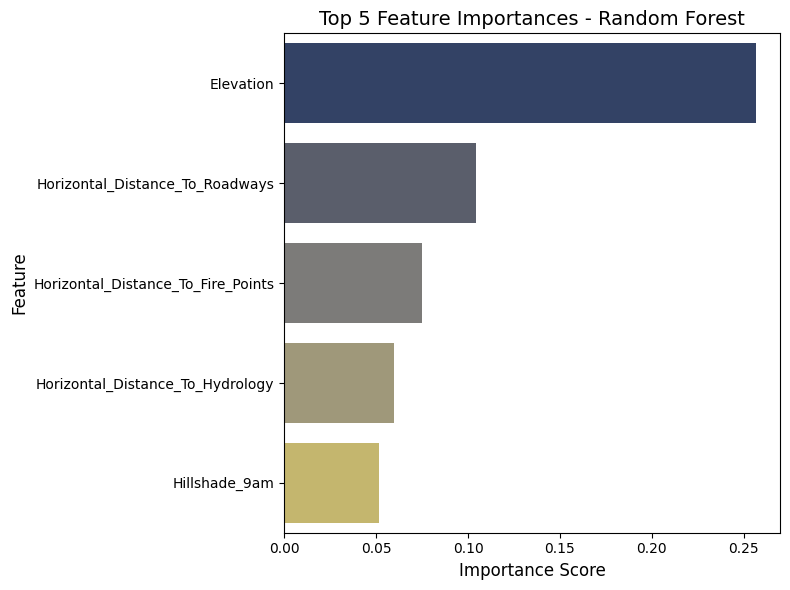

,Feature,Importance
0,Elevation,0.120370
10,Wilderness_Area1,0.067885
17,Soil_Type4,0.055834
16,Soil_Type3,0.050907
25,Soil_Type12,0.042903


C:\Users\Dell\AppData\Local\Temp\ipykernel_14660\3606209956.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp, x="Importance", y="Feature", palette="plasma")


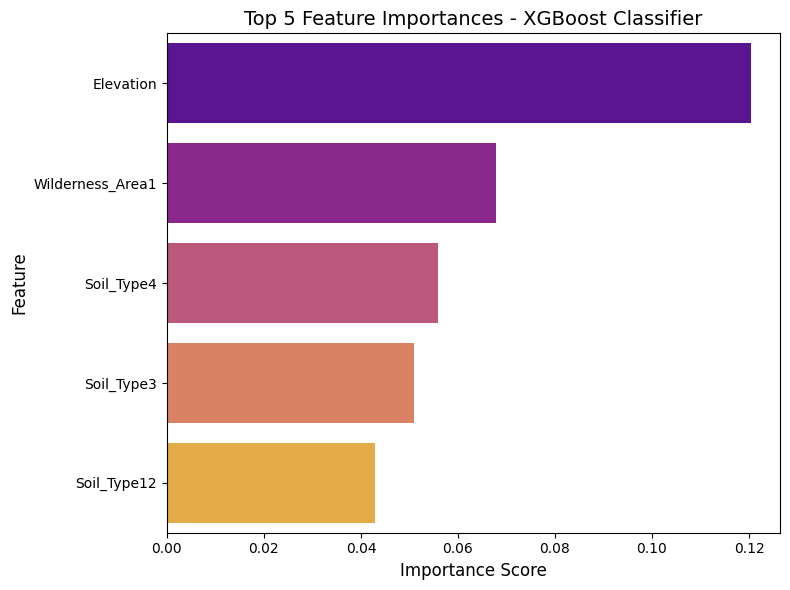

In [47]:
# Feature importance - Random Forest 🌲

importances = rf.feature_importances_
feat_imp = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feat_imp = feat_imp.sort_values("Importance", ascending=False).head(5)
display(feat_imp)
plt.figure(figsize=(8,6))
sns.barplot(data=feat_imp, x="Importance", y="Feature", palette="cividis")
plt.title("Top 5 Feature Importances - Random Forest", fontsize=14)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()

# Feature importance - XGBoost 🔮

importances = xgb.feature_importances_
feat_imp = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feat_imp = feat_imp.sort_values("Importance", ascending=False).head(5)
display(feat_imp)
plt.figure(figsize=(8,6))
sns.barplot(data=feat_imp, x="Importance", y="Feature", palette="plasma")
plt.title("Top 5 Feature Importances - XGBoost Classifier", fontsize=14)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()

In [48]:
# ✅ Sample Prediction
sample_input = X_test.iloc[[0]]
print("\n Sample Prediction:")
print(f"Random Forest ➜ Cover Type {rf.predict(sample_input)[0]}")
print(f"XGBoost Classifier ➜ Cover Type {xgb.predict(sample_input)[0]}")


 Sample Prediction:
Random Forest ➜ Cover Type 5
XGBoost Classifier ➜ Cover Type 4
